sources



1 Additional feature to analyse:
Methane levels 800k years
sea ice coverage 
total solar irradiance


read up:

Frequency analysis
Linear regression

Global GDP (https://ourworldindata.org/grapher/world-gdp-over-the-last-two-millennia?time=1900..latest)
Global population: (https://www.worldometers.info/world-population/world-population-by-year/)



FFT Function Fast Furier Transform for frequency analysis
https://www.youtube.com/watch?v=arYKpiVACvY
https://www.youtube.com/watch?v=sa7E9qUHYXw

Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

CArbon Tracker video:(https://www.youtube.com/watch?v=I7jKxO4nKZc)

(check data from papers by Parrenin et al. 2013; Snyder et al. 2016, Bereiter et al. 2015)

IPCC report 2023:
https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_FullVolume.pdf

Citable Glossary : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_AnnexesIndex.pdf

python:
Time series analysis and precidction: (https://www.youtube.com/watch?v=ilw2AnNsbIc)
Time series: (https://www.youtube.com/watch?v=huNTC4Zw2S8)



## set environment, import modules

In [49]:
import pandas as pd
# Successfully installed xlrd-2.0.1
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

### Import composite CO2


In [50]:
# Import Excel ref: https://datatofish.com/read_excel/
# skiprows: https://www.statology.org/pandas-read-excel-skip-rows/

dfCO2 = pd.read_excel("Data\CO2_Luthi_et_al._2008_Nature.xls", sheet_name="3.  Composite CO2", skiprows=6)
dfCO2.head()

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


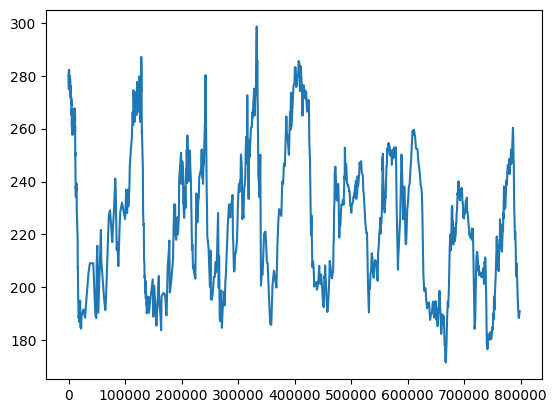

In [51]:
plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])

In [52]:
# read in temperature

#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)
dfTemperature = pd.read_csv('Data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91)
dfTemperature.head()

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN


In [53]:
dfTemperature.columns

Index(['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature'], dtype='object')

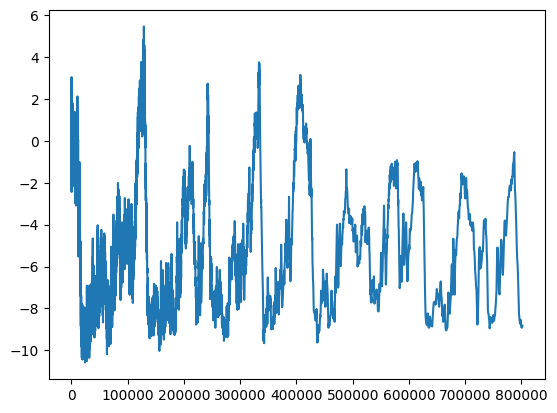

In [54]:
plt.plot(dfTemperature['Age'],dfTemperature['Temperature'])

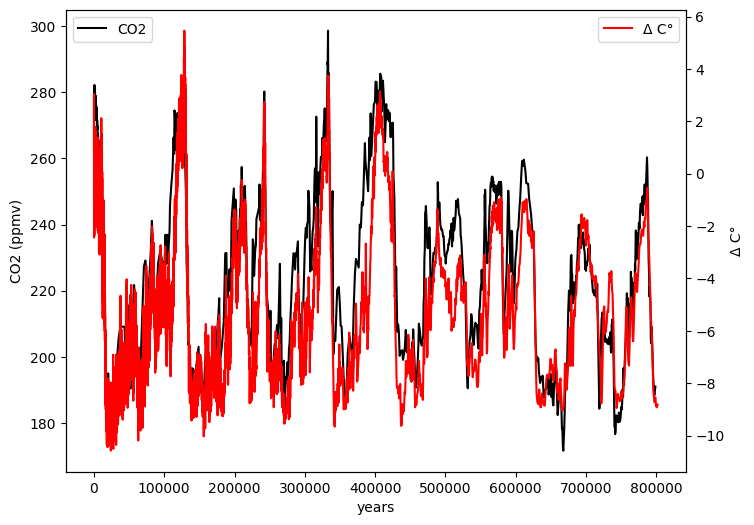

In [70]:
#Dual axis (ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/)

fig, ax1 = plt.subplots(figsize=(8,6))
ax2=ax1.twinx()


ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'],color='black', label='CO2')
ax2.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r',label='Δ C°')
ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('years')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()


#plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])
#plt.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r')